# Time series data
- 시간에 따라 값이 변하는 data 예측
- 주식시장이 대표적인 예

In [1]:
#!pip install finance-datareader

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_addons as tfa
import numpy as np
import FinanceDataReader as fdr
import pandas as pd
from tqdm import tqdm

Instructions for updating:
non-resource variables are not supported in the long term


# 주식DATA 가져오기(예제하기 위함)
- fdr.StockListing('KRX') // 'KRX' - 한국, 'NASDAQ' - 나스닥
- fdr.DataReader('종목코드','시작일자','종료일자')

In [3]:
df_krx = fdr.StockListing('KRX')
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7092,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7093,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7094,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7095,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [4]:
#삼성전자(005930)
df_samsung = fdr.DataReader('005930', '2021')

###### 예제 텍스트 생성

# 다시 본론

In [5]:
timesteps = seq_Length = 7
data_dim = 5
hidden_dim = 7
output_dim = 1

###### 최근날짜부터 data가 올 수 있게 변경
- 역순으로 data 정렬되어 있는 지 확인하기

In [6]:
xy = df_samsung[::-1]
print(xy)

             Open   High    Low  Close    Volume    Change
Date                                                      
2021-12-08  78300  78600  77100  77400  20779880  0.000000
2021-12-07  76100  77700  75600  77400  19232453  0.014417
2021-12-06  75100  76700  74900  76300  16391250  0.009259
2021-12-03  75600  76000  74100  75600  18330240 -0.002639
2021-12-02  73900  75800  73800  75800  23652940  0.018817
...           ...    ...    ...    ...       ...       ...
2021-01-08  83300  90000  83000  88800  59013307  0.071170
2021-01-07  82800  84200  82700  82900  32644642  0.008516
2021-01-06  83300  84500  82100  82200  42089013 -0.020262
2021-01-05  81600  83900  81600  83900  35335669  0.010843
2021-01-04  81000  84400  80200  83000  38655276  0.024691

[232 rows x 6 columns]


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
xy = scaler.fit_transform(xy)
x = xy[:, :-1]
y = xy[:, [-1]]

In [9]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_Length):
    _x = x[i:i + seq_Length]
    _y = y[i + seq_Length]
    print(_x, "->", _y, "\n")
    dataX.append(_x)
    dataY.append(_y)

[[0.44444444 0.33088235 0.41509434 0.38738739 0.1518619 ]
 [0.34259259 0.29779412 0.34433962 0.38738739 0.13298513]
 [0.2962963  0.26102941 0.31132075 0.33783784 0.09832584]
 [0.31944444 0.23529412 0.27358491 0.30630631 0.12197921]
 [0.24074074 0.22794118 0.25943396 0.31531532 0.18690982]
 [0.15277778 0.19117647 0.15566038 0.25225225 0.16619521]
 [0.20833333 0.15808824 0.10377358 0.11261261 0.26878702]] -> [0.32943888] 

[[0.34259259 0.29779412 0.34433962 0.38738739 0.13298513]
 [0.2962963  0.26102941 0.31132075 0.33783784 0.09832584]
 [0.31944444 0.23529412 0.27358491 0.30630631 0.12197921]
 [0.24074074 0.22794118 0.25943396 0.31531532 0.18690982]
 [0.15277778 0.19117647 0.15566038 0.25225225 0.16619521]
 [0.20833333 0.15808824 0.10377358 0.11261261 0.26878702]
 [0.13888889 0.125      0.14622642 0.15765766 0.10187946]] -> [0.15046015] 

[[0.2962963  0.26102941 0.31132075 0.33783784 0.09832584]
 [0.31944444 0.23529412 0.27358491 0.30630631 0.12197921]
 [0.24074074 0.22794118 0.25943396

In [10]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataY)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [11]:
X = tf.placeholder(tf.float32, [None, seq_Length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [12]:
cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
outputs, _states = tf.compat.v1.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\since\anaconda3\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:699: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "
C:\Users\since\anaconda3\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [13]:
#!pip install tf-slim

In [14]:
from tf_slim.layers import layers as _layers

In [15]:
Y_pred = _layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)

C:\Users\since\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [16]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))

In [17]:
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
for i in tqdm(range(1000)):
    _, l = sess.run([train, loss], feed_dict = {X: trainX, Y: trainY})
    print(l)

  1%|          | 10/1000 [00:00<00:49, 20.07it/s]

17.22123
12.155769
8.1664915
5.119893
3.1783142
2.6306002
3.3920145
4.2925024
4.520076
4.162552
3.5600464
2.9842296
2.5710242
2.3473392
2.278905
2.309764
2.3859167


  3%|▎         | 27/1000 [00:00<00:21, 46.23it/s]

2.4658375
2.5229962
2.544436
2.5278313
2.4782763
2.405349
2.3206222
2.2356443
2.1603522
2.1019075
2.063965
2.0464563
2.045936
2.0565047
2.071172
2.083386


  5%|▍         | 46/1000 [00:01<00:14, 66.86it/s]

2.0883555
2.0838337
2.0701916
2.0498607
2.0263844
2.0034025
1.9838377
1.9694245
1.960607
1.9567277
1.9563911
1.957884
1.9595578
1.960117
1.95878
1.9553221
1.9500108


  6%|▋         | 64/1000 [00:01<00:12, 74.48it/s]

1.9434689
1.9364963
1.9298878
1.9242771
1.9200306
1.91721
1.9155962
1.9147751
1.914249
1.9135573
1.9123713
1.9105463
1.9081235
1.9052882
1.9023019


  8%|▊         | 83/1000 [00:01<00:11, 82.05it/s]

1.8994269
1.8968652
1.894721
1.8929933
1.8915946
1.8903854
1.8892155
1.8879582
1.8865361
1.8849295
1.8831704
1.8813261
1.8794777
1.8776981
1.8760349
1.8745036
1.8730878
1.8717494


  9%|▉         | 92/1000 [00:01<00:10, 83.95it/s]

1.8704401
1.8691165
1.8677489
1.8663278
1.8648622
1.863374
1.8618906
1.8604361
1.8590258
1.8576636
1.8563418
1.8550471
1.8537633
1.8524771
1.8511797
1.8498709
1.8485551


 11%|█         | 110/1000 [00:01<00:10, 85.15it/s]

1.8472407
1.8459365
1.8446499
1.8433837
1.8421373
1.8409072
1.8396873
1.838473
1.8372606
1.8360488
1.8348389
1.8336338
1.8324363
1.8312495
1.8300738
1.8289094
1.8277549
1.8266077
1.8254663


 13%|█▎        | 130/1000 [00:02<00:09, 87.99it/s]

1.8243295
1.8231966
1.822068
1.8209457
1.8198296
1.8187212
1.8176205
1.8165272
1.8154411
1.8143609
1.8132862
1.8122166
1.8111521
1.810093
1.8090398
1.8079933
1.8069525
1.8059183
1.80489


 15%|█▌        | 150/1000 [00:02<00:09, 90.71it/s]

1.8038676
1.8028505
1.8018386
1.8008322
1.7998309
1.7988353
1.7978454
1.796861
1.7958829
1.79491
1.7939429
1.792981
1.7920244
1.7910734
1.7901279
1.7891879
1.7882537


 17%|█▋        | 169/1000 [00:02<00:10, 81.72it/s]

1.7873249
1.7864017
1.7854841
1.784572
1.7836654
1.7827646
1.7818689
1.7809793
1.7800951
1.7792168
1.7783439
1.7774769
1.7766156
1.7757599


 18%|█▊        | 178/1000 [00:02<00:10, 81.39it/s]

1.7749102
1.7740662
1.7732279
1.7723955
1.7715691
1.7707486
1.7699339
1.7691251
1.7683223
1.7675257
1.7667351
1.7659501
1.7651714
1.7643987
1.7636322
1.7628716


 20%|█▉        | 196/1000 [00:02<00:10, 79.05it/s]

1.7621171
1.7613688
1.7606266
1.7598901
1.7591599
1.7584358
1.7577175
1.7570056
1.7562993
1.755599
1.7549045
1.7542158
1.7535329
1.7528554
1.7521838
1.7515173


 21%|██        | 212/1000 [00:03<00:10, 78.25it/s]

1.7508564
1.7502005
1.74955
1.748904
1.7482631
1.7476265
1.7469945
1.7463669
1.745743
1.745123
1.7445067
1.7438935
1.7432835
1.7426763
1.7420715
1.741469


 23%|██▎       | 229/1000 [00:03<00:09, 80.14it/s]

1.7408683
1.7402694
1.7396717
1.7390754
1.7384794
1.7378838
1.7372885
1.7366927
1.7360964
1.7354993
1.734901
1.7343011
1.7336996
1.7330958
1.7324898


 25%|██▍       | 246/1000 [00:03<00:09, 77.53it/s]

1.7318811
1.73127
1.7306553
1.7300372
1.7294157
1.7287903
1.7281609
1.7275273
1.7268893
1.7262467
1.725599
1.724947
1.7242892
1.7236264
1.7229578
1.7222841


 26%|██▌       | 262/1000 [00:03<00:09, 77.41it/s]

1.7216041
1.7209183
1.7202262
1.7195278
1.718823
1.7181113
1.7173926
1.7166667
1.715934
1.7151933
1.7144449
1.7136886
1.7129239
1.7121505
1.7113683
1.7105771


 28%|██▊       | 278/1000 [00:03<00:09, 78.00it/s]

1.7097766
1.7089665
1.708146
1.7073154
1.7064742
1.7056221
1.7047583
1.703883
1.7029955
1.7020956
1.7011827
1.7002566
1.6993167
1.6983628


 29%|██▊       | 287/1000 [00:04<00:08, 79.28it/s]

1.6973941
1.6964102
1.6954107
1.6943954
1.6933634
1.6923144
1.6912476
1.6901625
1.6890588
1.6879358
1.6867926
1.685629
1.6844443
1.6832376
1.6820084
1.6807561


 30%|███       | 304/1000 [00:04<00:08, 79.10it/s]

1.6794804
1.6781799
1.6768544
1.6755031
1.6741256
1.6727208
1.6712885
1.669828
1.6683388
1.6668203
1.6652719
1.6636934
1.6620843
1.6604444
1.6587737
1.6570721


 32%|███▏      | 321/1000 [00:04<00:08, 82.20it/s]

1.6553392
1.653576
1.6517824
1.6499591
1.6481068
1.6462268
1.6443205
1.6423897
1.6404352
1.6384603
1.6364673
1.634459
1.6324385
1.6304091
1.6283748
1.6263388


 34%|███▍      | 338/1000 [00:04<00:08, 76.17it/s]

1.6243051
1.6222775
1.6202586
1.618252
1.6162593
1.6142826
1.6123217
1.6103771
1.608447
1.6065297
1.6046224
1.6027224
1.600827
1.5989335
1.5970399


 35%|███▌      | 354/1000 [00:04<00:08, 72.80it/s]

1.5951447
1.5932474
1.5913472
1.589445
1.5875409
1.5856353
1.5837284
1.5818202
1.5799102
1.5779972
1.5760804
1.5741584
1.5722301
1.5702944


 36%|███▌      | 362/1000 [00:05<00:08, 71.89it/s]

1.5683507
1.5663985
1.5644386
1.5624706
1.5604955
1.5585133
1.5565236
1.5545263
1.5525203
1.5505043
1.5484768
1.5464362
1.5443811
1.5423101


 38%|███▊      | 379/1000 [00:05<00:08, 74.24it/s]

1.5402222
1.5381162
1.5359918
1.5338484
1.5316857
1.529504
1.5273025
1.525082
1.522842
1.5205835
1.5183061
1.5160104
1.5136973
1.5113676
1.5090225


 40%|███▉      | 395/1000 [00:05<00:08, 71.61it/s]

1.5066637
1.5042932
1.5019128
1.4995258
1.4971344
1.4947425
1.4923534
1.4899714
1.4876008
1.4852457
1.4829111
1.4806012
1.4783202
1.4760711


 41%|████      | 411/1000 [00:05<00:08, 72.98it/s]

1.473857
1.4716785
1.4695346
1.4674239
1.4653407
1.4632796
1.4612316
1.4591866
1.4571345
1.4550644
1.4529675
1.4508367
1.4486682
1.4464622
1.4442244


 43%|████▎     | 427/1000 [00:05<00:07, 73.40it/s]

1.441963
1.439691
1.4374238
1.4351766
1.4329638
1.4307969
1.4286833
1.4266258
1.424623
1.4226706
1.4207621
1.4188911
1.4170521
1.4152403
1.413452


 44%|████▍     | 443/1000 [00:06<00:07, 72.68it/s]

1.4116842
1.4099327
1.4081926
1.4064592
1.4047261
1.4029884
1.4012413
1.3994823
1.3977096
1.3959235
1.3941253
1.3923163
1.3904992
1.3886764
1.3868502


 45%|████▌     | 451/1000 [00:06<00:07, 71.61it/s]

1.3850234
1.3831993
1.3813798
1.3795687
1.3777664
1.3759742
1.3741924
1.3724202
1.3706568
1.3689013
1.3671523
1.3654099
1.363673
1.3619416


 47%|████▋     | 468/1000 [00:06<00:07, 73.00it/s]

1.3602151
1.3584931
1.3567748
1.3550596
1.353347
1.3516355
1.3499248
1.3482144
1.3465034
1.3447912
1.3430762
1.3413577
1.339634
1.3379037
1.3361648


 48%|████▊     | 485/1000 [00:06<00:06, 74.17it/s]

1.3344159
1.332655
1.3308805
1.3290906
1.3272834
1.3254573
1.3236115
1.3217435
1.3198531
1.3179386
1.3159997
1.3140357
1.3120458
1.3100307
1.3079896


 50%|█████     | 501/1000 [00:06<00:07, 70.11it/s]

1.3059232
1.3038319
1.3017166
1.2995789
1.2974197
1.2952411
1.2930449
1.2908341
1.2886102
1.2863771
1.2841364
1.2818922
1.2796466
1.2774031


 51%|█████     | 509/1000 [00:07<00:06, 70.51it/s]

1.2751641
1.2729325
1.2707105
1.2684999
1.2663038
1.2641228
1.2619586
1.2598128
1.2576882
1.2555971
1.2536191
1.2523208
1.2550952
1.2712315
1.2821348


 52%|█████▎    | 525/1000 [00:07<00:06, 71.77it/s]

1.249552
1.2540648
1.264932
1.2406123
1.2555858
1.2479004
1.2395163
1.250637
1.2342652
1.2417116
1.2363772
1.2315955
1.2366669
1.2269388
1.2321616


 54%|█████▍    | 541/1000 [00:07<00:06, 73.20it/s]

1.2271432
1.2248621
1.2270552
1.2204258
1.2230028
1.2196778
1.2174381
1.2186933
1.2142406
1.2149
1.213428
1.2105256
1.2113668
1.2086089


 56%|█████▌    | 557/1000 [00:07<00:06, 73.75it/s]

1.2072201
1.207161
1.2043953
1.203711
1.2028942
1.2005557
1.1999935
1.1988049
1.196852
1.1961917
1.1949058
1.1931763
1.1923599
1.1911242
1.1894988


 57%|█████▋    | 573/1000 [00:07<00:05, 74.04it/s]

1.188512
1.1873989
1.185858
1.1846604
1.183638
1.1822654
1.1808739
1.1797746
1.178627
1.1772449
1.1759186
1.1747714
1.1736033
1.172298
1.1709508


 59%|█████▉    | 589/1000 [00:08<00:05, 72.66it/s]

1.1696913
1.1685083
1.1673106
1.1660544
1.1647465
1.1634322
1.1621339
1.1608584
1.1596004
1.1583576
1.1571398
1.1559775
1.1549808
1.1544178
1.1553082


 60%|██████    | 605/1000 [00:08<00:05, 73.20it/s]

1.160141
1.1787349
1.2123103
1.2625291
1.1854246
1.1488589
1.193076
1.1720849
1.1451206
1.1693382
1.1582384
1.1413318
1.1558638
1.151235
1.1383182


 61%|██████▏   | 613/1000 [00:08<00:05, 71.90it/s]

1.1451223
1.1464915
1.1367545
1.1367725
1.1411656
1.1359881
1.1313268
1.1351142
1.1351845
1.129098
1.1285902
1.1312797
1.1285865
1.1244214


 63%|██████▎   | 630/1000 [00:08<00:05, 73.23it/s]

1.1240406
1.1254728
1.1247317
1.1213735
1.1189849
1.1187464
1.1192997
1.1192217
1.1175717
1.1154172
1.1132495
1.1116464
1.1106007
1.1099995
1.1099045


 65%|██████▍   | 646/1000 [00:08<00:05, 70.23it/s]

1.1106645
1.1140535
1.1227492
1.1500983
1.1937646
1.2746215
1.1988969
1.1125829
1.133527
1.1694511
1.1260533
1.1105597
1.1495937
1.1276953


 66%|██████▌   | 662/1000 [00:09<00:04, 71.48it/s]

1.1009026
1.1374722
1.1314644
1.097398
1.1278911
1.1286446
1.0954483
1.1215289
1.1194309
1.0936986
1.118632
1.1110609
1.0927186
1.1148448
1.1042019


 68%|██████▊   | 678/1000 [00:09<00:04, 72.39it/s]

1.0907221
1.1094123
1.0998423
1.0880842
1.103782
1.0973604
1.085028
1.09747
1.0954034
1.0824673
1.0909733
1.0936924
1.0812259
1.08388
1.0901212


 69%|██████▊   | 686/1000 [00:09<00:04, 71.38it/s]

1.0813646
1.0774887
1.0832174
1.0819808
1.0755157
1.0745703
1.0780208
1.0778824
1.0730554
1.0702688
1.0714478
1.0732135
1.0728759
1.0699812


 70%|███████   | 702/1000 [00:09<00:04, 72.12it/s]

1.0670197
1.0652549
1.0649091
1.0655699
1.0668874
1.0695184
1.0740924
1.0849377
1.103494
1.1438043
1.1786475
1.1981342
1.118491
1.0618701
1.0927855


 72%|███████▏  | 718/1000 [00:09<00:03, 72.89it/s]

1.1225923
1.0914581
1.0588074
1.0914606
1.1099002
1.0681397
1.0611631
1.0879581
1.0765865
1.0550805
1.0658336
1.0728312
1.0570683
1.0554583
1.0661142


 73%|███████▎  | 734/1000 [00:10<00:03, 73.43it/s]

1.0601807
1.0510849
1.0576746
1.0610108
1.0514979
1.049307
1.0551581
1.0534327
1.0472361
1.0464197
1.0499681
1.0501642
1.0457652
1.0427816
1.0434017


 75%|███████▌  | 750/1000 [00:10<00:03, 72.24it/s]

1.0454242
1.0459073
1.0439082
1.0411832
1.0389535
1.0379063
1.0378355
1.0385021
1.040035
1.043146
1.0502949
1.0657711
1.1024709
1.1684222
1.2463616


 77%|███████▋  | 766/1000 [00:10<00:03, 71.93it/s]

1.2144036
1.075504
1.058176
1.1500009
1.0992224
1.0449106
1.1126848
1.0735996
1.0414208
1.0947093
1.0582092
1.044761
1.0799012
1.0434304


 77%|███████▋  | 774/1000 [00:10<00:03, 70.69it/s]

1.0491234
1.062305
1.0346923
1.0522356
1.0434982
1.0353037
1.0485725
1.0332539
1.0399556
1.0398444
1.0300632
1.0391817
1.0322342
1.0295215


 79%|███████▉  | 790/1000 [00:10<00:02, 70.31it/s]

1.0354741
1.0281112
1.0275532
1.0317181
1.0259612
1.0245513
1.0281805
1.0246688
1.0214664
1.0239844
1.0235891
1.0199379
1.0196222
1.0212104


 81%|████████  | 806/1000 [00:11<00:02, 71.17it/s]

1.0199652
1.017197
1.0165452
1.0175569
1.017852
1.0165517
1.0145624
1.0132465
1.0128667
1.0131371
1.0136253
1.0140588
1.0146604
1.0156844


 82%|████████▏ | 823/1000 [00:11<00:02, 72.79it/s]

1.017957
1.0223652
1.031868
1.049987
1.0863602
1.129102
1.1650542
1.1041857
1.0237374
1.0218848
1.0727351
1.0640392
1.0138094
1.0291767
1.0572758


 83%|████████▎ | 831/1000 [00:11<00:02, 71.10it/s]

1.0239806
1.0090994
1.03548
1.0268307
1.0069203
1.022247
1.0249528
1.0071871
1.0130908
1.0192568
1.0067776
1.0077004
1.0145084
1.0061713
1.0035257


 85%|████████▍ | 847/1000 [00:11<00:02, 73.06it/s]

1.0100838
1.0065322
1.0003282
1.003327
1.005982
1.0018688
0.99802643
0.9993677
1.0017548
1.0004182
0.9968998
0.995106
0.99587446
0.99740535
0.9977449


 86%|████████▋ | 863/1000 [00:11<00:01, 73.86it/s]

0.9965038
0.9947187
0.9929932
0.9917499
0.99090564
0.99037826
0.99008894
0.99007857
0.9907296
0.9929654
0.9999394
1.0191287
1.0757439
1.1781152
1.3516386


 88%|████████▊ | 879/1000 [00:12<00:01, 73.69it/s]

1.1397922
0.99870706
1.1194832
1.0766778
1.0054955
1.0721514
1.0094008
1.0258741
1.0370823
0.99473804
1.0343848
1.0076017
1.0131038
1.0211606


 90%|████████▉ | 895/1000 [00:12<00:01, 74.40it/s]

0.9971199
1.0173377
0.9974737
1.005287
1.0018164
0.9961488
1.0052283
0.9918041
1.0017177
0.99160445
0.9941364
0.9934013
0.9870058
0.992952


 91%|█████████ | 911/1000 [00:12<00:01, 71.63it/s]

0.9871944
0.98641616
0.9897989
0.9839382
0.98362416
0.98587465
0.98150444
0.9804007
0.9829316
0.98055786
0.97793037
0.9795476
0.9796306
0.9768198
0.9756029


 92%|█████████▏| 919/1000 [00:12<00:01, 71.77it/s]

0.97656
0.9770398
0.97575164
0.9738133
0.9729352
0.9730705
0.9736131
0.9739804
0.9736306
0.9730028
0.97209305
0.9712395
0.97044086
0.9697459
0.9692012


 94%|█████████▎| 935/1000 [00:12<00:00, 72.00it/s]

0.9688858
0.9688666
0.9695712
0.97158325
0.9773631
0.9906913
1.0267051
1.0808791
1.1815047
1.0930182
0.9922279
0.98377097
1.0447083
1.0229795


 95%|█████████▌| 951/1000 [00:13<00:00, 71.50it/s]

0.97266495
1.0178542
1.0023581
0.96915746
1.0079124
0.9936801
0.9715613
0.999543
0.98110986
0.9724885
0.9905181
0.9711594
0.97535527
0.9804572


 97%|█████████▋| 967/1000 [00:13<00:00, 71.14it/s]

0.96629786
0.9766716
0.971683
0.96519643
0.9730461
0.9656584
0.9630204
0.96906066
0.96401703
0.96006835
0.96427584
0.9638808
0.9586178
0.9578991


 98%|█████████▊| 983/1000 [00:13<00:00, 73.13it/s]

0.9607862
0.9600532
0.9563166
0.9552567
0.95696753
0.95793545
0.9566748
0.95412254
0.95255405
0.9524162
0.9532347
0.9546443
0.956098
0.95835936
0.961313


 99%|█████████▉| 991/1000 [00:13<00:00, 71.48it/s]

0.9676456
0.9755149
0.9909209
1.0002985
1.0146992
0.9979776
0.9765254
0.95299226
0.950253
0.96396285
0.9719025
0.96622
0.95121956
0.94684863


100%|██████████| 1000/1000 [00:13<00:00, 72.16it/s]

0.9550149
0.9624117
0.9613426


In [20]:
testPredict = sess.run(Y_pred, feed_dict={X: testX})

In [21]:
import matplotlib.pyplot as plt

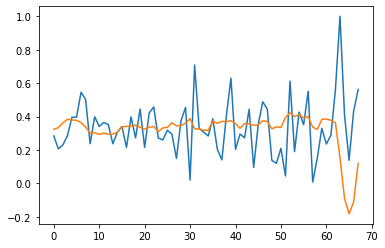

In [22]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()